In [ ]:
!pip install ezdxf
!pip install opencv-python

In [ ]:
#connect to google drive
import os, sys
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def Mask_crop(id):

    image = cv2.imread('/content/drive/Shareddrives/SmartCLT_DF2023/Scan2/GOOD_SCAN/' + str(id) + '_image.jpg')
    mask = cv2.imread('/content/drive/Shareddrives/SmartCLT_DF2023/Scan2/GOOD_SCAN/' + str(id) + '_mask.jpg', 0)

    buffer=0.025

    image = image[int(3500/(1-2*buffer)*buffer):int(1-2*buffer*buffer+3500),0:606]

    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))


    # Erode the mask
    kernel_size = 15  # You can adjust this value for more or less erosion
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    mask = cv2.erode(mask, kernel, iterations=1)

    # Blur image to enhance edge detection
    mask = cv2.GaussianBlur(mask, (15, 15), 0)

    # Perform the cropping operation using the mask
    cropped_image = cv2.bitwise_and(image, image, mask=mask)


    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2HSV)

    # Lower the saturation by scaling the saturation channel
    hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * 1, 0, 255).astype(np.uint8)

    # Convert the image back to the BGR color space
    grey_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)


    # Create an alpha channel with transparency
    alpha_channel = np.ones(grey_image.shape[:2], dtype=np.uint8) * 255
    alpha_channel[mask == 0] = 0

    # Add the alpha channel to the cropped image
    output_image = cv2.cvtColor(grey_image, cv2.COLOR_BGR2BGRA)
    output_image[:, :, 3] = alpha_channel

    # Display the output image
    #cv2_imshow(output_image)


    outputname = str(id) + '_cr_image.png'
    outputpath = '/content/drive/Shareddrives/SmartCLT_DF2023/T_Algorithm/OUT-DXF/CROP OUTPUT/'
    outputfile = outputpath + outputname
    cv2.imwrite(outputfile,output_image)


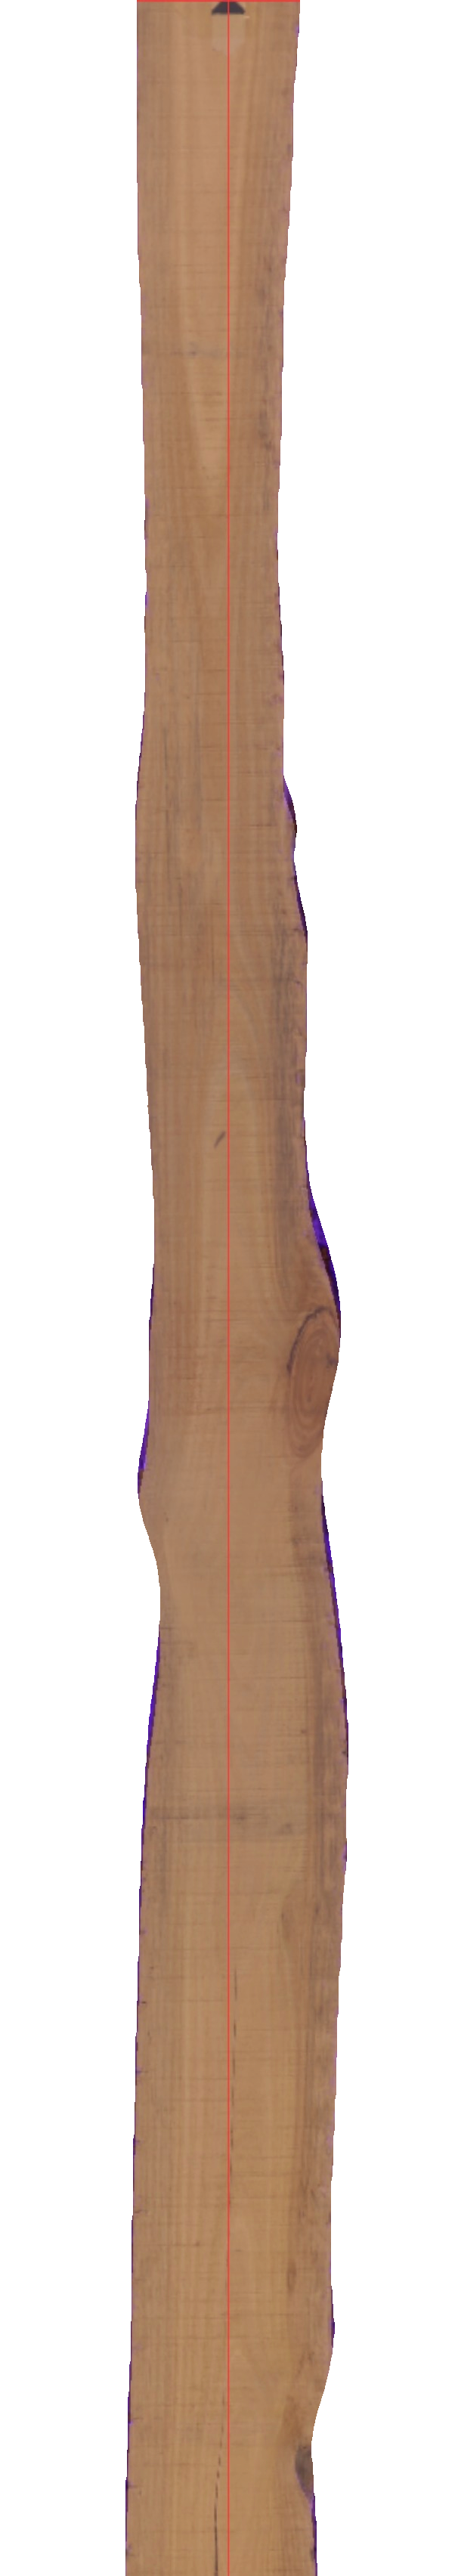

In [ ]:
Mask_crop('02')

In [ ]:
for i in range(34):
    id=i+1
    if id<10:
      id='0'+str(id)
    Mask_crop(id)
